<a href="https://colab.research.google.com/github/Mesy-Ariani/Model-Prediction-for-Machine-Failure/blob/main/Machine_Failure_Prediction_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# **Machine Failure Prediction**
> The Game Changers
---





---
# Business Problem
> Perusahaan X adalah sebuah perusahaan yang bergerak pada bidang produksi sparepart kendaraan bermotor yang berdiri sejak tahun 2000. Konsumen Perusahaan X meliputi beberapa pabrikan otomotif di Indonesia. Perusahaan X didukung oleh lebih dari 300 karyawan dan beberapa mesin produksi. Produk Perusahaan X memiliki kualitas yang terjamin dan sesuai dengan standar internasional, namun saat berjalannya rapat direksi, ditemukan masalah dimana saat ini sering terjadi kerusakan mesin (machine failure) pada saat berjalannya produksi yang mengakibatkan ada penambahan biaya, sehingga menyebabkan perusahaan X dinilai belum layak.
---





---
# Goals
> Tujuan dari project ini adalah untuk mengurangi biaya terkait kegagalan mesin pada produk / layanan dan memahami faktor-faktor penting yang mempengaruhi kegagalan mesin


---




---
# Solusi yang kami ditawarkan
---
> Adapun solusi yang dapat ditawarkan adalah sebagai berikut:
1. Menganalisis penyebab umum kegagalan mesin.
2. Mengidentifikasi titik lemah dalam perawatan dan pemeliharaan mesin.
3. Mencari solusi yang efektif untuk mencegah atau mengurangi kegagalan mesin, seperti perbaikan rutin yang terjadwal, pelatihan teknisi, atau implementasi pemantauan kondisi sehingga dapat mengurangi biaya yang dikeluarkan.






---
# Analisis Profitabilitas
> Tinjau biaya terkait kegagalan mesin, termasuk biaya perbaikan, biaya pemeliharaan preventif, kerugian pendapatan akibat downtime, dan reputasi yang terpengaruh.
---






---
# Metrics
---
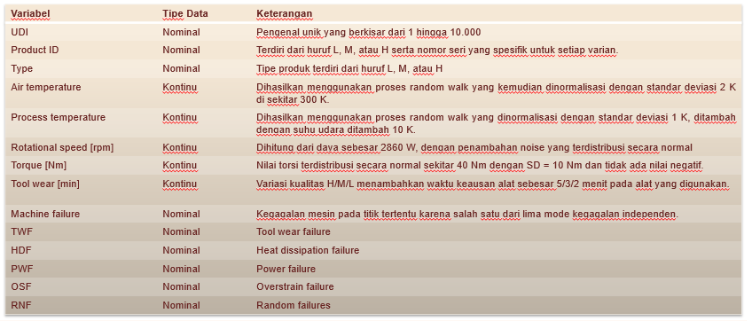



# Import Library

In [ ]:
#import library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy.stats import norm

#splitting dataset
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#resampling
from sklearn.utils import resample

#Cross Validation
from sklearn.model_selection import KFold

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load Data**

In [ ]:
engine = pd.read_csv("/content/drive/Shareddrives/SC_Final Project/Dataset/Predictive Maintenance/ai4i2020.csv")

In [ ]:
engine.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [ ]:
engine.describe()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

In [ ]:
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

### Missing Value
tidak terdapat missing value pada data

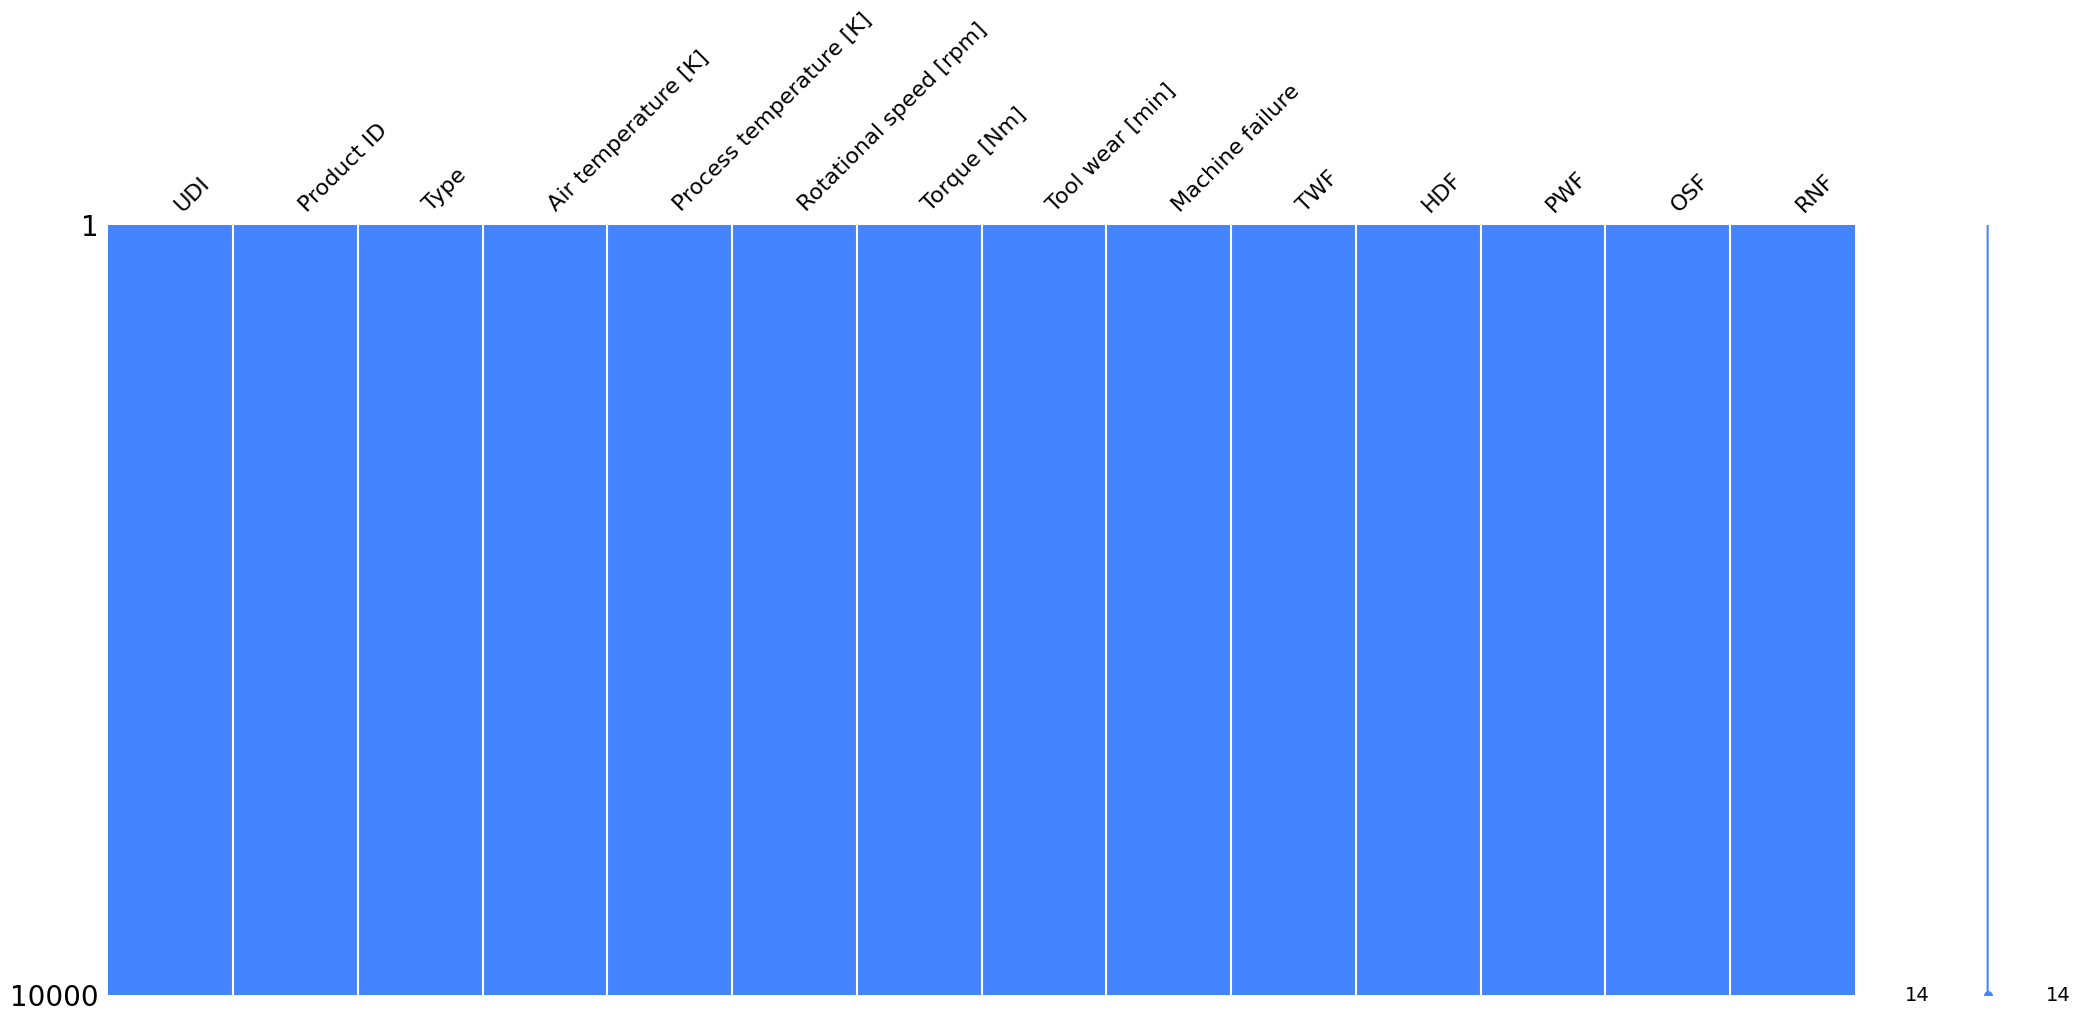

<Figure size 1000x600 with 0 Axes>

In [ ]:
msno.matrix(engine, color=(0.27, 0.52, 1.0))
plt.figure(figsize=(10,6))
plt.show()

### Duplicate
Tidak terdapat data duplikat pada dataset ini

In [ ]:
engine.duplicated().sum()

0

### Outlier

In [ ]:
engine.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

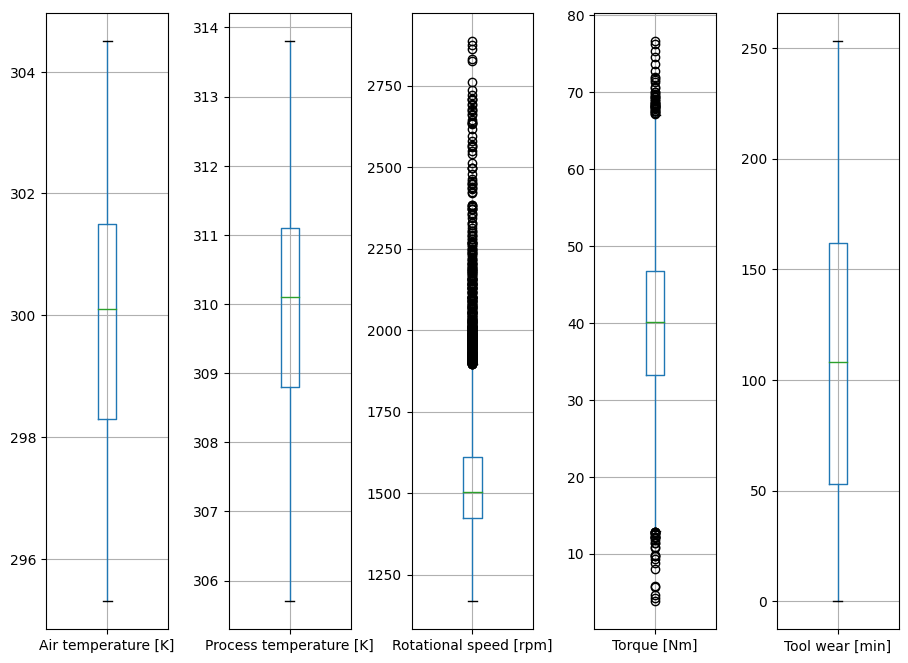

In [ ]:
# 6 subplots in one row
fig, ax = plt.subplots(1, 5, figsize=(11, 8))

# draw boxplots - for one column in each subplot
engine.boxplot('Air temperature [K]', ax=ax[0])
engine.boxplot('Process temperature [K]', ax=ax[1])
engine.boxplot('Rotational speed [rpm]', ax=ax[2])
engine.boxplot('Torque [Nm]', ax=ax[3])
engine.boxplot('Tool wear [min]', ax=ax[4])

plt.subplots_adjust(wspace=0.5)

plt.show()

**Banyak outlier pada Rotational speed dan Torque**

### Eksplanatory Data Analysis

#### 1. UDI
unique value **(unique identifier ranging from 1 to 10000)**. Untuk analisis kedepannya variabel ini akan di drop


In [ ]:
engine["UDI"].value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: UDI, Length: 10000, dtype: int64

#### 2. Product ID

unique value, untuk analisis kedepannya variabel ini akan di drop.

In [ ]:
engine['Product ID'].value_counts()

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64

#### 3. Type
 product type L, M or H from column Product ID

In [ ]:
engine['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

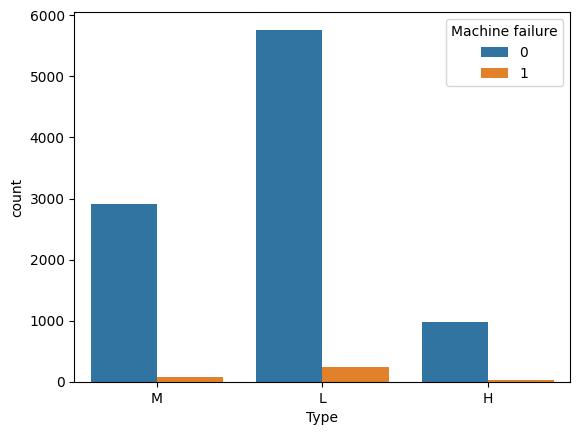

In [ ]:
sns.countplot(data=engine, x="Type", hue="Machine failure")

Barplot diatas menunjukkan distribusi dari variabel type, dengan type L, M dan H. Pada dataset ini, kebanyakan mesin memiliki Type L.

#### 4. Air temperature [K]
generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

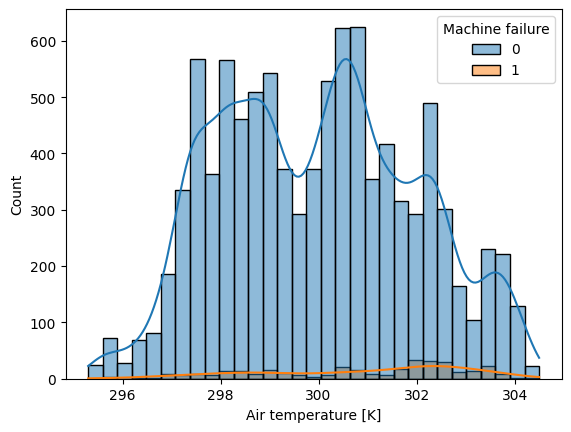

In [ ]:
# Histogram by Machine Failure
sns.histplot(data=engine, x="Air temperature [K]", hue="Machine failure",kde=True)

<ipython-input-21-edd94c8f3ec4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Air temperature [K]'], fit=norm);


Text(0, 0.5, 'Frequency')

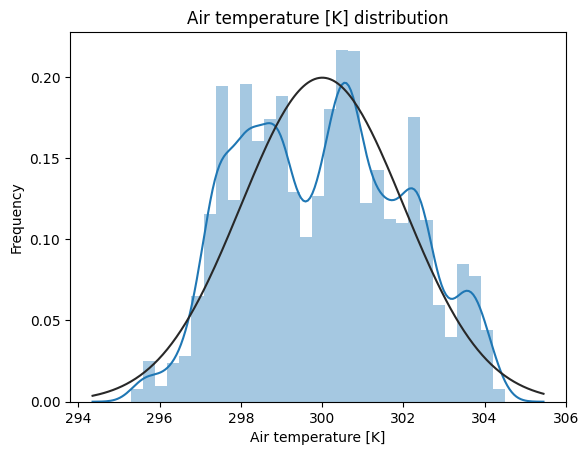

In [ ]:
# plot distribusi
sns.distplot(engine['Air temperature [K]'], fit=norm);
plt.title('Air temperature [K] distribution')
plt.ylabel('Frequency')

Air temperature [K] cenderung berdistribusi normal.

#### 5. Process temperature [K]
generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

<Axes: xlabel='Process temperature [K]', ylabel='Count'>

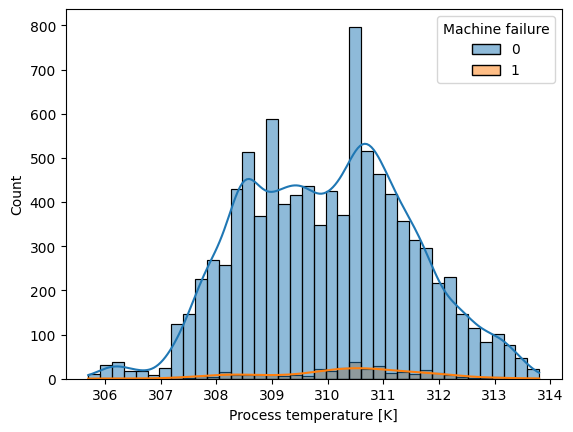

In [ ]:
# Histogram by Machine failure
sns.histplot(data=engine, x="Process temperature [K]", hue="Machine failure",kde=True)

<ipython-input-22-ce0c32723eba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Process temperature [K]'], fit=norm);


Text(0, 0.5, 'Frequency')

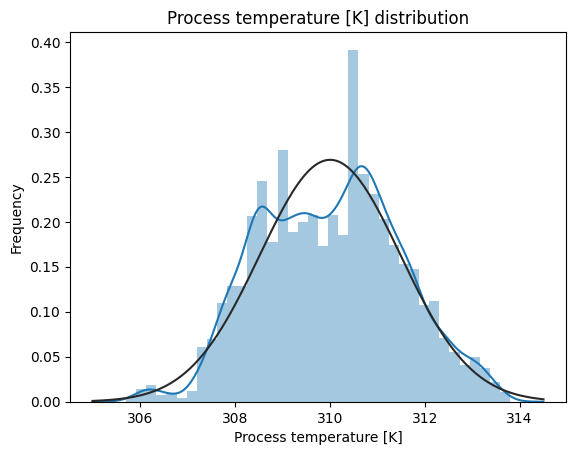

In [ ]:
# plot distribusi
sns.distplot(engine['Process temperature [K]'], fit=norm);
plt.title('Process temperature [K] distribution')
plt.ylabel('Frequency')

#### 6. Rotational speed [rpm]
calculated from a power of 2860 W, overlaid with a normally distributed noise.

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

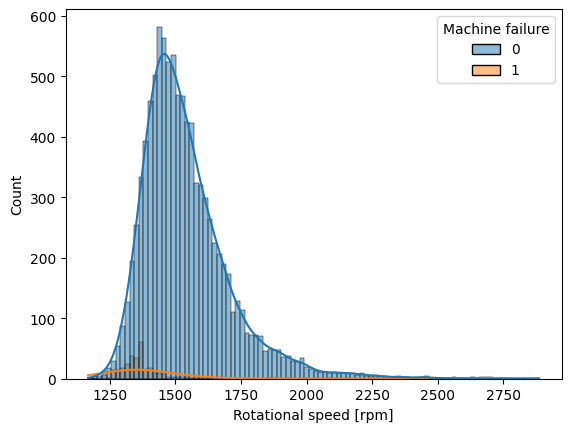

In [ ]:
# Histogram by Machine failure
sns.histplot(data=engine, x="Rotational speed [rpm]", hue="Machine failure",kde=True)

<ipython-input-23-08cd06b48a0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Rotational speed [rpm]'], fit=norm);


Text(0, 0.5, 'Frequency')

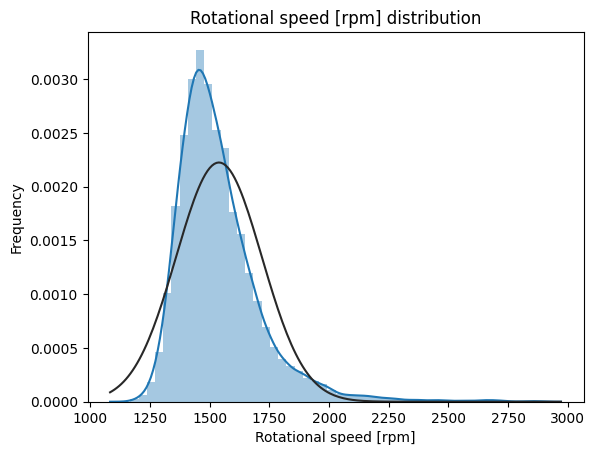

In [ ]:
#plot distribusi
sns.distplot(engine['Rotational speed [rpm]'], fit=norm);
plt.title('Rotational speed [rpm] distribution')
plt.ylabel('Frequency')

#### 7. Torque [Nm]

torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values. 8.tool wear [min]: (breakdown and gradual failure of a cutting tool due to regular operation) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

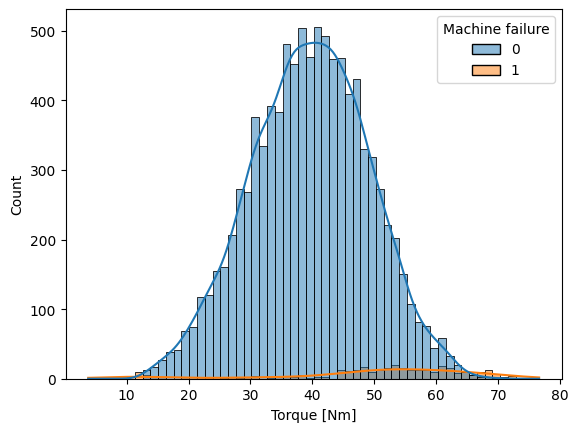

In [ ]:
# Histogram by Machine failure
sns.histplot(data=engine, x="Torque [Nm]", hue="Machine failure",kde=True)

<ipython-input-25-de58d5455189>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Torque [Nm]'], fit=norm);


Text(0, 0.5, 'Frequency')

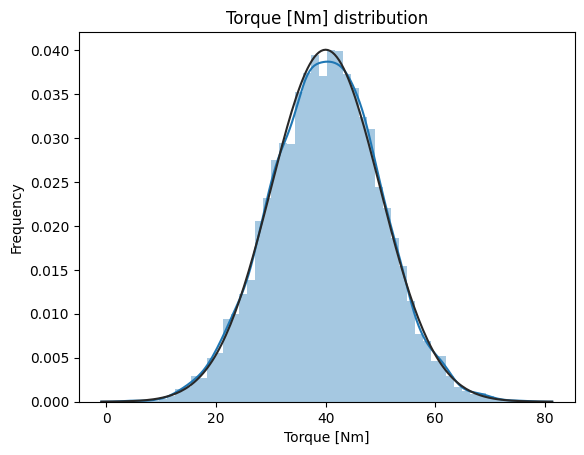

In [ ]:
# plot distribusi data
sns.distplot(engine['Torque [Nm]'], fit=norm);
plt.title('Torque [Nm] distribution')
plt.ylabel('Frequency')

#### 8. Tool wear [min]
the quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

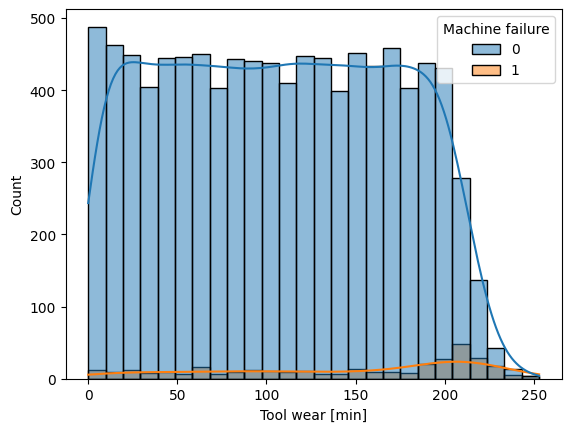

In [ ]:
# Histogram by Machine failure
sns.histplot(data=engine, x="Tool wear [min]", hue="Machine failure",kde=True)

<ipython-input-27-68214b7695be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Tool wear [min]'], fit=norm);


Text(0, 0.5, 'Frequency')

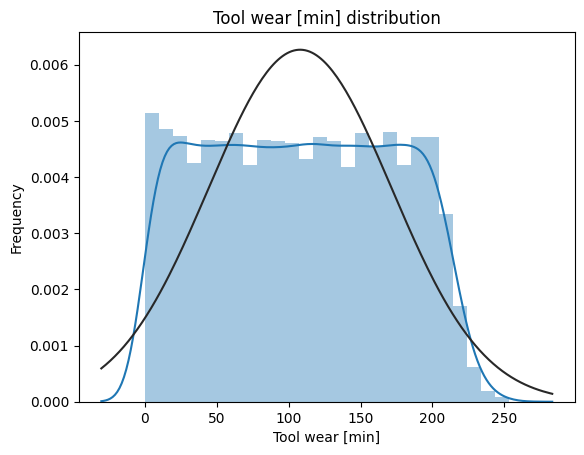

In [ ]:
# plot distribusi data
sns.distplot(engine['Tool wear [min]'], fit=norm);
plt.title('Tool wear [min] distribution')
plt.ylabel('Frequency')

#### 9. Machine Failure
sebagai variabel target/dependen

<Axes: xlabel='Machine failure', ylabel='count'>

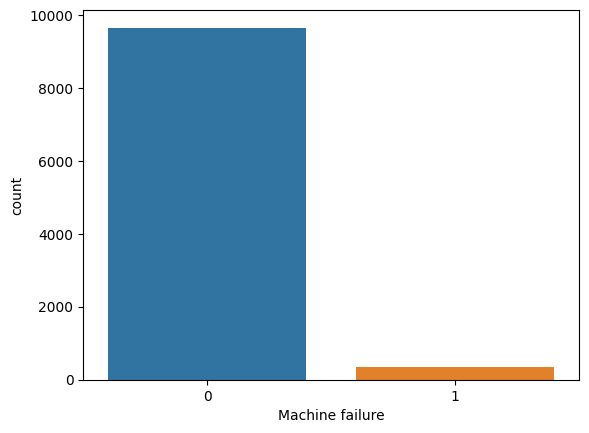

In [ ]:
sns.countplot(x=engine["Machine failure"])

Berdasarkan variabel Machine failure diatas dapat dilihat bahwa distribusi variabel target imbalance. Untuk analisis kedepannya akan dilakukan handling imbalance.

### 10. Independent Failure

#### 1. TWF
Tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

<Axes: xlabel='TWF', ylabel='count'>

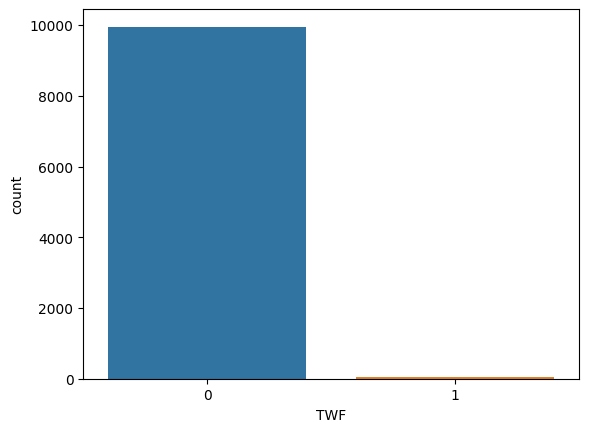

In [ ]:
sns.countplot(x=engine["TWF"])

#### 2. HDF

Heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

<Axes: xlabel='HDF', ylabel='count'>

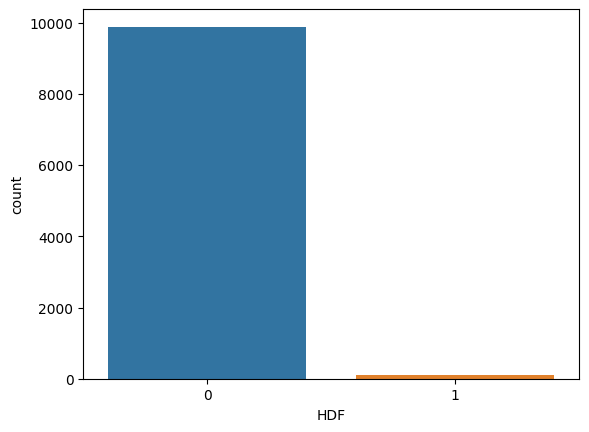

In [ ]:
sns.countplot(x=engine["HDF"])

#### 3. PWF
Power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

<Axes: xlabel='PWF', ylabel='count'>

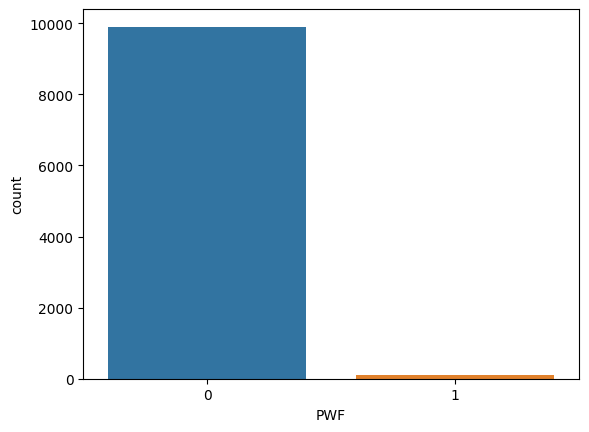

In [ ]:
sns.countplot(x=engine["PWF"])

#### 4. OSF
Overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

<Axes: xlabel='OSF', ylabel='count'>

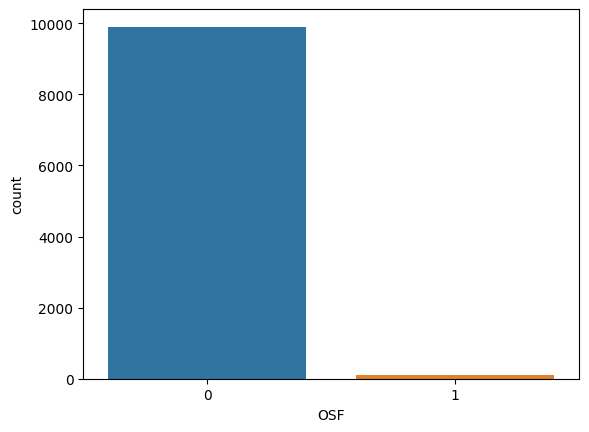

In [ ]:
sns.countplot(x=engine["OSF"])

####  5. RNF
Random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

<Axes: xlabel='RNF', ylabel='count'>

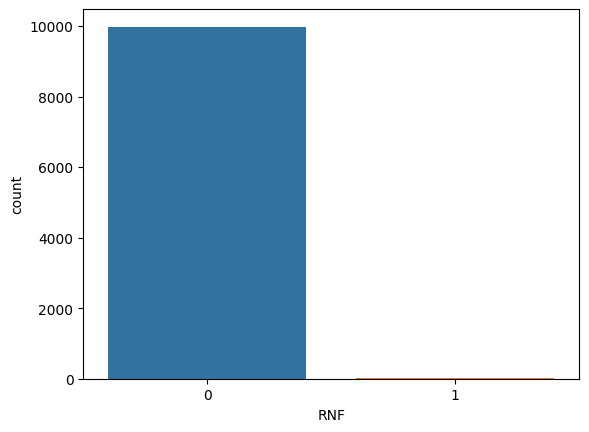

In [ ]:
sns.countplot(x=engine["RNF"])

### 11. Correlation


In [ ]:
# define variabel numerik berdasarkan dataset asli
num = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]',
       'Torque [Nm]', 'Tool wear [min]']

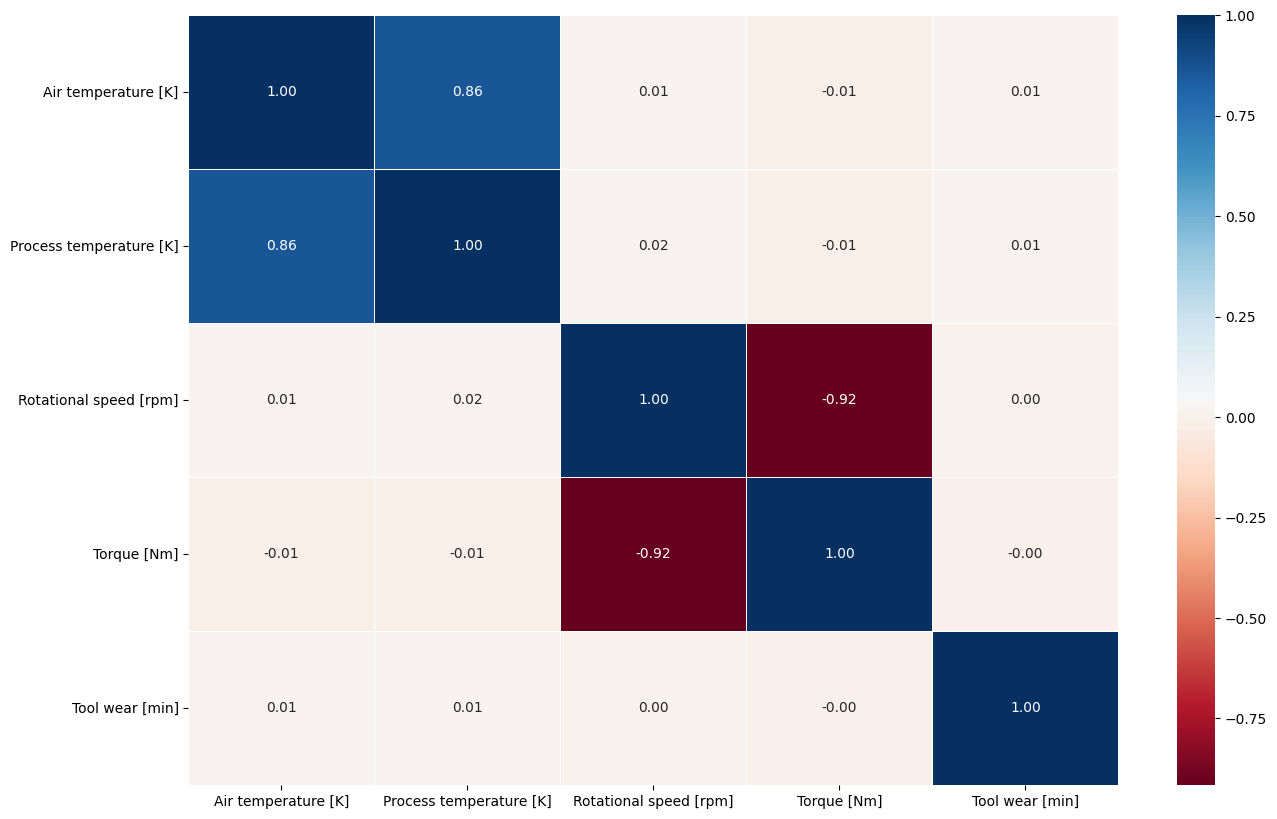

In [ ]:
# korelasi Spearman
corr_matrix = engine[num].corr(method="spearman")
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap='RdBu',
                 fmt=".2f")

### Pairplot

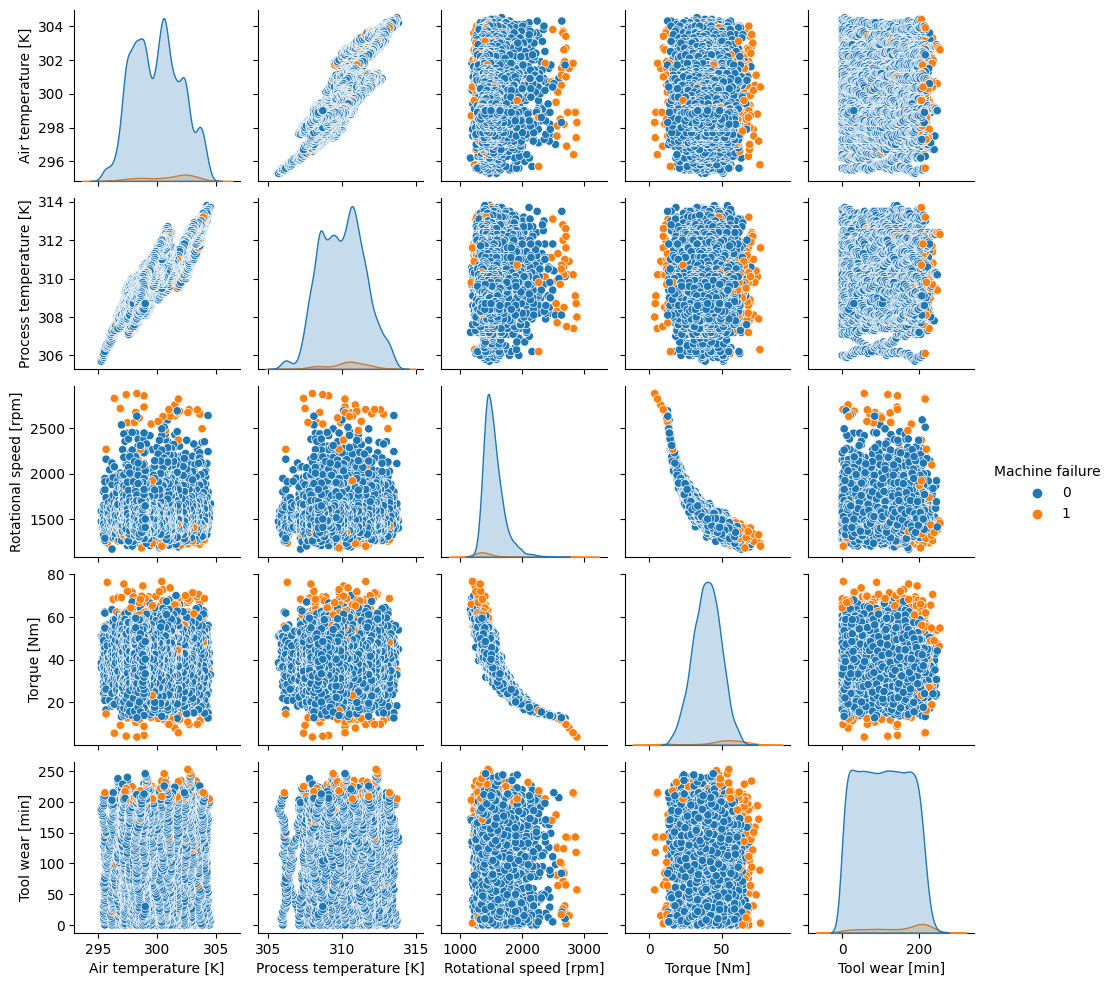

In [ ]:
sns.pairplot(data=engine[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]',
       'Torque [Nm]', 'Tool wear [min]','Machine failure']], hue='Machine failure',
             diag_kind="kde", height=2)
plt.show()

### Automated EDA

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.

Computing skewtest-f549ee4c6010df0871ad8731210f7197:  32%|███▏      | 596/1885 [00:01<00:01, 698.84it/s]                                   /usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats


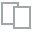
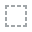
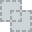
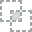
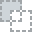
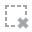
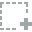
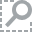
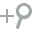
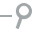
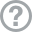
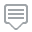
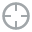
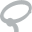
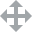
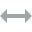
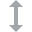
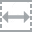
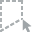
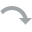
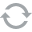
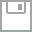
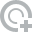
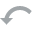
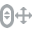
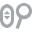
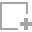
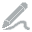
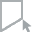
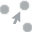
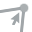
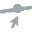

In [ ]:
from dataprep.eda import create_report
create_report(engine).show()

#### Automated EDA Insight
- Tidak terdapat missing value dan data duplikat pada data.
- UDI : unique value
- Product ID : unique value
- Type : terdapat 3 kategori, yaitu L,M,H. Dimana jumlah kategori terbanyak L.
- Air temperature : berdistribusi normal, dengan mean sekitar 300 K.
- Process Temperature : berdistribusi normal dengan 310 K.
- Rotational speed : berdistribusi menceng kanan, mean 1538.78 rpm, banyak banget outlier atas
- Torque (Nm) : Berdistribusi normal, terdapat outlier atas dan bawah, mean 39.99
- Tool wear [min] : berdistribusi normal
- Machine failure : kelas 0 lebih banyak
- TWF : kelas 0 lebih banyak
- HDF : kelas 0 lebih banyak
- PWF : kelas 0 lebih banyak
- OSF : kelas 0 lebih banyak
- RNF : kelas 0 lebih banyak

- Korelasi
  - Air temperature dan Process Temperature memiliki korelasi yang tinggi, sebesar 0.86
  - Rotational Speed dan Torque memiliki korelasi yang tinggi dan negatif, sebesar -0.92

Analisis selanjutnya perlu, encoding, standardisasi dan penanganan imbalance dataset, dan penanganan outlier.


### Check Target Value yang tidak sesuai
Jika salah satu atau lebih dari kelima independen failure bernilai 1 maka variabel Machine failure bernilai 1. Maka dari itu, perlu di cek apakah dataset kita sudah memenuhi rule tersebut.



In [ ]:
df_or = engine.copy()

In [ ]:
df_or = engine[(engine['TWF'] == 1) & (engine['Machine failure'] == 0)]
df_or[["Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"]]

Empty DataFrame
Columns: [Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
df_or = engine[(engine['HDF'] == 1) & (engine['Machine failure'] == 0)]
df_or[["Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"]]

Empty DataFrame
Columns: [Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
df_or = engine[(engine['PWF'] == 1) & (engine['Machine failure'] == 0)]
df_or[["Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"]]

Empty DataFrame
Columns: [Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
df_or = engine[(engine['OSF'] == 1) & (engine['Machine failure'] == 0)]
df_or[["Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"]]

Empty DataFrame
Columns: [Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
df_or = engine[(engine['RNF'] == 1) & (engine['Machine failure'] == 0)]
df_or[["Machine failure", "TWF", "HDF", "PWF", "OSF","RNF"]]

Machine failure  TWF  HDF  PWF  OSF  RNF
1221                0    0    0    0    0    1
1302                0    0    0    0    0    1
1748                0    0    0    0    0    1
2072                0    0    0    0    0    1
2559                0    0    0    0    0    1
3065                0    0    0    0    0    1
3452                0    0    0    0    0    1
5471                0    0    0    0    0    1
5489                0    0    0    0    0    1
5495                0    0    0    0    0    1
5509                0    0    0    0    0    1
5553                0    0    0    0    0    1
5639                0    0    0    0    0    1
6091                0    0    0    0    0    1
6913                0    0    0    0    0    1
6960                0    0    0    0    0    1
7488                0    0    0    0    0    1
7868                0    0    0    0    0    1

Terlihat bahwa dari tabel diatas masih terdapat variabel Machine failure yang bernilai 0, padahal harusnya bernilai 1 karena salah satu dari independent failure, yaitu RNF bernilai 1.

**Maka dari itu, untuk analisis kedeoannya akan dikategori ulang pada variabel Machine failure**

### Drop Variabel yang tidak penting

In [ ]:
#drop kolom UDi, Product ID
engine.drop(['UDI','Product ID'], axis=1, inplace = True)

In [ ]:
# kategori ulang variabel Machine failure
engine['Machine failure'] = 0

engine.loc[engine['TWF'] == 1, 'Machine failure'] = 1
engine.loc[engine['HDF'] == 1, 'Machine failure'] = 1
engine.loc[engine['PWF'] == 1, 'Machine failure'] = 1
engine.loc[engine['OSF'] == 1, 'Machine failure'] = 1
engine.loc[engine['RNF'] == 1, 'Machine failure'] = 1

In [ ]:
engine["Machine failure"].value_counts()

0    9652
1     348
Name: Machine failure, dtype: int64

<Axes: xlabel='Machine failure', ylabel='count'>

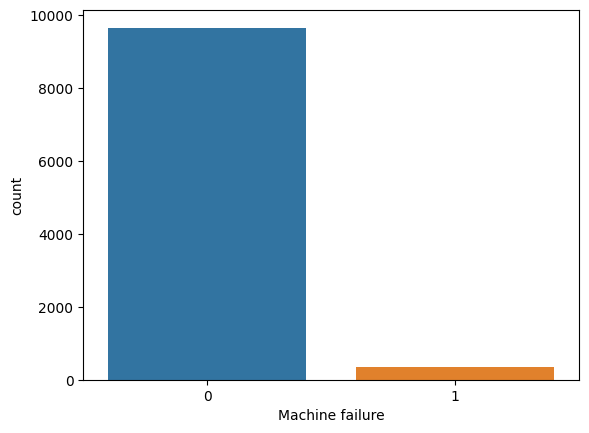

In [ ]:
sns.countplot(x=engine["Machine failure"])

In [ ]:
# drop individual failure types
engine.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

### **New Feature**
Power merupakan perkalian antara Rotational speed dan Torque.

In [ ]:
engine['Power'] = engine[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)

In [ ]:
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   Power                    10000 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


<Axes: >

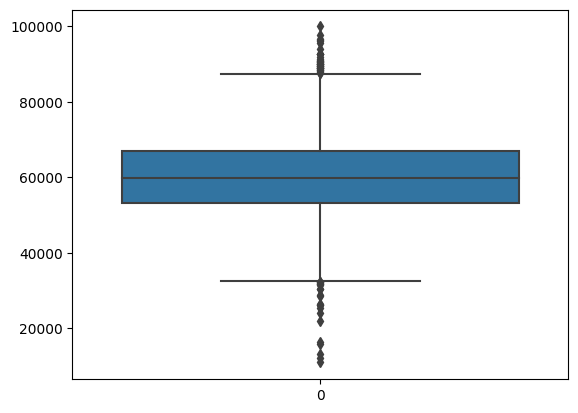

In [ ]:
# Plot the histogram of Power attribute
sns.boxplot(engine['Power'])

<Axes: xlabel='Power', ylabel='Count'>

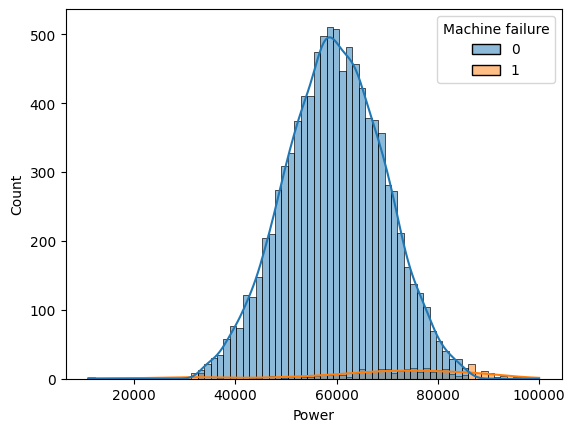

In [ ]:
# Histogram Power by Machine failure
sns.histplot(data=engine, x="Power", hue="Machine failure",kde=True)

<ipython-input-57-5959816f2be9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engine['Power'], fit=norm);


Text(0, 0.5, 'Frequency')

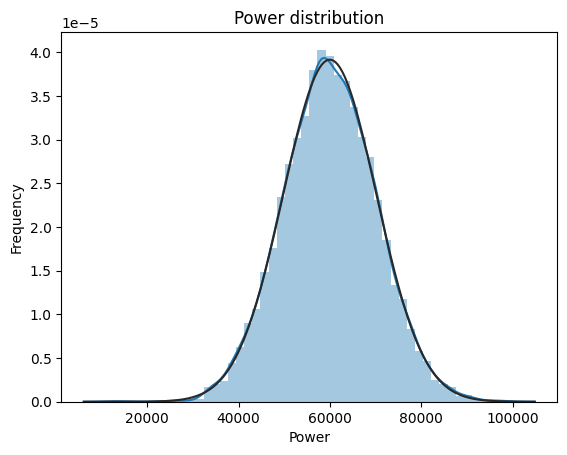

In [ ]:
# plot distribusi Power
sns.distplot(engine['Power'], fit=norm);
plt.title('Power distribution')
plt.ylabel('Frequency')

### **Encoding**
Encoding pada variabel kategorik, karena data kategorik bertipe nominal maka dilakukan one hot encoding.

In [ ]:
categorical_val = ['Type']
engine_dmy = pd.get_dummies(engine, columns = categorical_val)
engine_dmy.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure    Power  Type_H  Type_L  \
0         42.8                0                0  66382.8       0       0   
1         46.3                3                0  65190.4       0       1   
2         49.4                5                0  74001.2       0       1   
3         39.5                7                0  56603.5       0       1   
4         40.0                9                0  56320.0       0       1   

   Type_M  
0       1  
1       0  
2       0  
3       0  
4       0

In [ ]:
engine_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
 6   Power                    10000 non-null  float64
 7   Type_H                   10000 non-null  uint8  
 8   Type_L                   10000 non-null  uint8  
 9   Type_M                   10000 non-null  uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 576.3 KB


### **Splitting Dataset**

In [ ]:
X = engine_dmy.drop(['Machine failure'], axis = 1)
y = engine_dmy['Machine failure']

In [ ]:
# Mengganti nama kolom X
X.columns = ['Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Power',
       'Type_H', 'Type_L', 'Type_M']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Outlier Handling

In [ ]:
# Apply Box-Cox transformation to selected columns in train and test datasets
columns_to_transform = ['Rotational_speed_rpm', 'Torque_Nm','Power']
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
X_train[columns_to_transform] = boxcox_transformer.fit_transform(X_train[columns_to_transform])
X_test[columns_to_transform] = boxcox_transformer.transform(X_test[columns_to_transform])

## **Standardisasi**
dengan standard scaler

In [ ]:
num = ['Air_temperature_K', 'Process_temperature_K','Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min','Power']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num] = sc.fit_transform(X_train[num])
X_test[num] = sc.transform(X_test[num])

## Hybrid Sampling SMOTENN

In [ ]:
from imblearn.combine import SMOTEENN

# create the over-sampling and under-sampling object
smote_enn = SMOTEENN(sampling_strategy = 0.8, random_state=42)

# resample the data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

0    6685
1    5679
Name: Machine failure, dtype: int64

### **1. Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [ ]:
#Prediction of the test variable
lr_y_preds=lr.predict(X_test)

In [ ]:
#Training score
print("Training Score :", lr.score(X_resampled,y_resampled))
print("Testing Score :", lr.score(X_test,y_test))

Training Score : 0.8724522808152702
Testing Score : 0.862


In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2424
           1       0.14      0.67      0.23        76

    accuracy                           0.86      2500
   macro avg       0.56      0.77      0.58      2500
weighted avg       0.96      0.86      0.90      2500



#### Hyperparameter Tuning - Cross Validation

In [ ]:
Accuracies= {} # make dictionry to save all accuracies models

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':np.logspace(-2,2,40), 'solver':['liblinear','saga']}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(lg, parameters, cv=folds, refit=True, verbose=2, scoring='f1', n_jobs=-1 )

# execute search
result = search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8680672860221421
Best Hyperparameters: {'C': 62.355073412739124, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
Logreg = LogisticRegression(C =  62.355073412739124, penalty = 'l2' , solver = 'liblinear')
Logreg.fit(X_resampled,y_resampled)

y_pred_log=Logreg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2424
           1       0.14      0.71      0.24        76

    accuracy                           0.86      2500
   macro avg       0.57      0.79      0.58      2500
weighted avg       0.96      0.86      0.90      2500



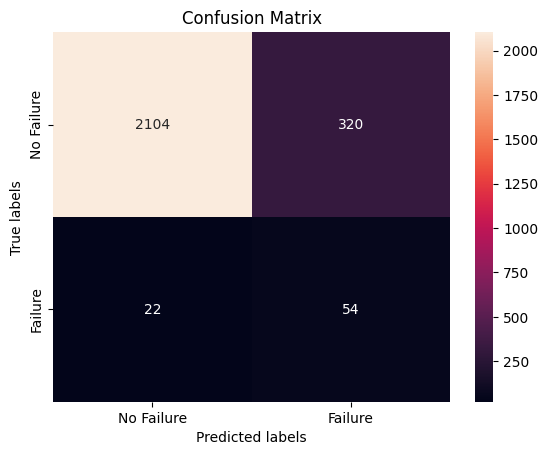

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Model Performance

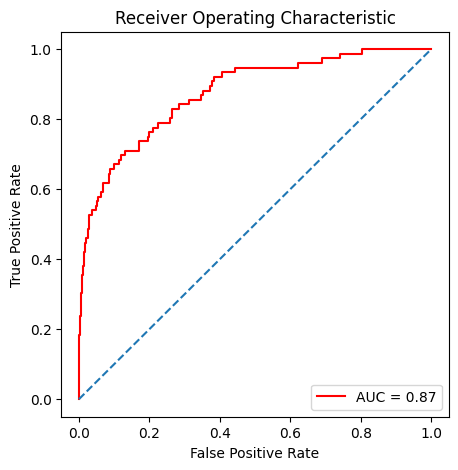

In [ ]:
#ROC Curve
y_proba_log=Logreg.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_log[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

### **2. SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_sv = SVC(probability=True)
model_sv.fit(X_resampled, y_resampled) # Train/Fit model

y_pred_sv= model_sv.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred_sv)) # output accuracy

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2424
           1       0.29      0.88      0.43        76

    accuracy                           0.93      2500
   macro avg       0.64      0.91      0.70      2500
weighted avg       0.97      0.93      0.95      2500



In [ ]:
print("Training Score :", model_sv.score(X_resampled,y_resampled))
print("Testing Score :", model_sv.score(X_test,y_test))

Training Score : 0.9717728890326756
Testing Score : 0.9292


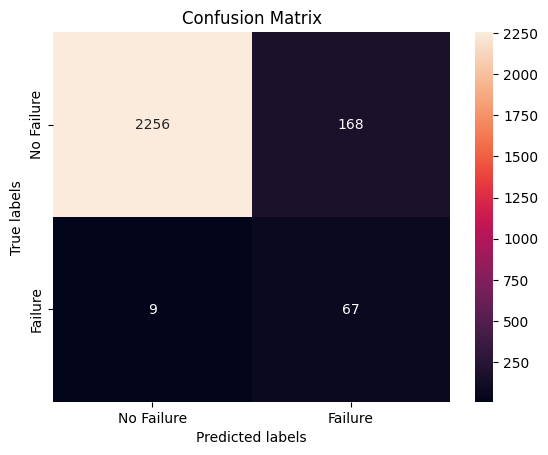

In [ ]:
cm = confusion_matrix(y_test, y_pred_sv)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

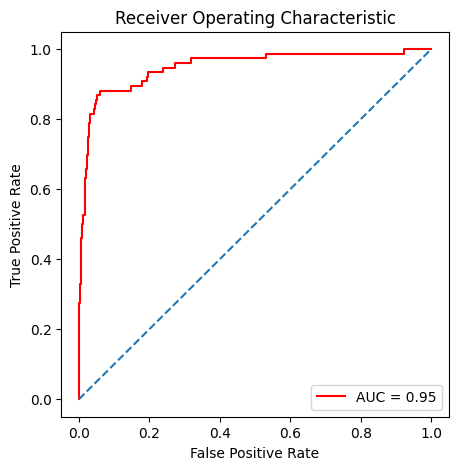

In [ ]:
y_proba_svm=model_sv.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_svm[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

#### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
svc =SVC()

# parameters
parameters = [{'kernel': ['rbf','linear'],'gamma':[0.1,0.9,0.06],
        'C':[2,3,4],'degree':[2], 'probability':[True]}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# define search
search = GridSearchCV(svc, parameters, cv=folds, scoring='f1')

# execute search
result = search.fit(X_resampled, y_resampled)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9969222963108966
Best Hyperparameters: {'C': 4, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True}


In [ ]:
sv = SVC(C=4, degree=2, gamma=0.9, kernel='rbf',probability=True)
sv.fit(X_resampled,y_resampled)

y_pred_s=sv.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2424
           1       0.34      0.67      0.45        76

    accuracy                           0.95      2500
   macro avg       0.66      0.82      0.71      2500
weighted avg       0.97      0.95      0.96      2500



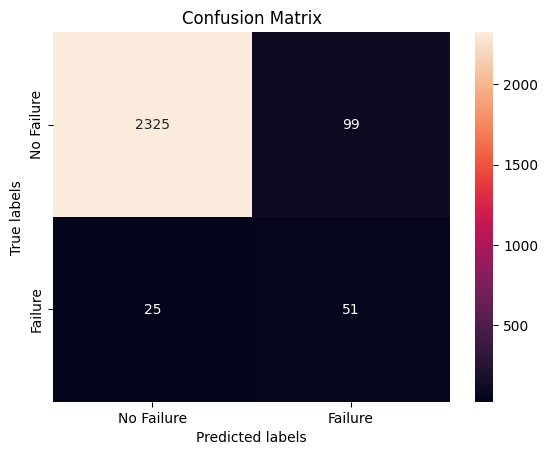

In [ ]:
cm = confusion_matrix(y_test, y_pred_s)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

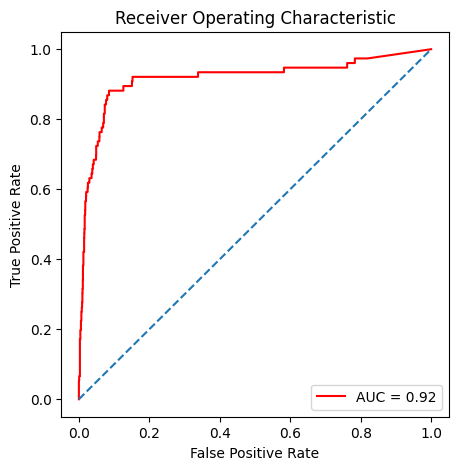

In [ ]:
y_proba=sv.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

 ### **3. Decision Tree**

In [ ]:
clf2=DecisionTreeClassifier(criterion='gini') #Gini Index
clf2.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [ ]:
print("Training Score :", clf2.score(X_resampled,y_resampled))
print("Testing Score :", clf2.score(X_test,y_test))

Training Score : 1.0
Testing Score : 0.9508


In [ ]:
Y_pred=clf2.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2424
           1       0.36      0.76      0.49        76

    accuracy                           0.95      2500
   macro avg       0.67      0.86      0.73      2500
weighted avg       0.97      0.95      0.96      2500



#### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
dt = DecisionTreeClassifier(random_state=42)

# parameters
parameters=[{'criterion':['gini','entropy','log_loss'],'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4,5],
             'min_samples_leaf':[1,2,3,4,5],'max_features':['sqrt','log2'],'random_state':[42]}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(dt, parameters, cv=folds, scoring='f1')

# execute search
result = search.fit(X_resampled, y_resampled)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.931887008824552
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
Dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2,random_state = 42)
Dtree.fit(X_resampled,y_resampled)
y_pred_tree=Dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2424
           1       0.25      0.82      0.38        76

    accuracy                           0.92      2500
   macro avg       0.62      0.87      0.67      2500
weighted avg       0.97      0.92      0.94      2500



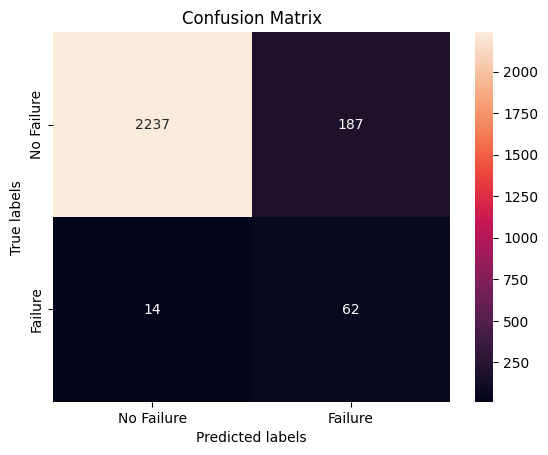

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

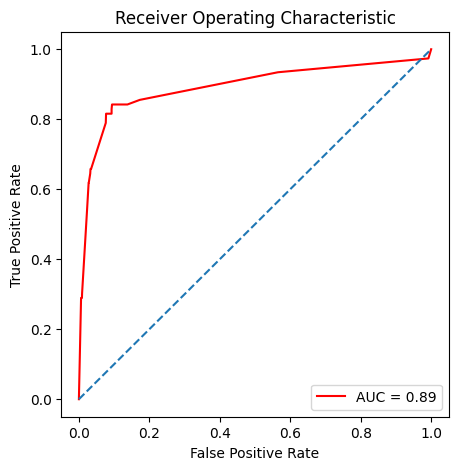

In [ ]:
#ROC Curve
y_proba_tree=Dtree.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_tree[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

#### Post Pruning

[Text(0.4477593195676275, 0.9705882352941176, 'x[2] <= -1.005\ngini = 0.497\nsamples = 12364\nvalue = [6685, 5679]'),
 Text(0.14758869179600886, 0.9117647058823529, 'x[0] <= 0.299\ngini = 0.27\nsamples = 4734\nvalue = [760, 3974]'),
 Text(0.07150776053215077, 0.8529411764705882, 'x[4] <= 1.269\ngini = 0.453\nsamples = 1705\nvalue = [592, 1113]'),
 Text(0.03325942350332594, 0.7941176470588235, 'x[5] <= 2.221\ngini = 0.481\nsamples = 936\nvalue = [559, 377]'),
 Text(0.022172949002217297, 0.7352941176470589, 'x[4] <= 1.248\ngini = 0.021\nsamples = 558\nvalue = [552, 6]'),
 Text(0.013303769401330377, 0.6764705882352942, 'x[0] <= -1.46\ngini = 0.011\nsamples = 550\nvalue = [547, 3]'),
 Text(0.008869179600886918, 0.6176470588235294, 'x[0] <= -1.495\ngini = 0.13\nsamples = 43\nvalue = [40, 3]'),
 Text(0.004434589800443459, 0.5588235294117647, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.013303769401330377, 0.5588235294117647, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.017738

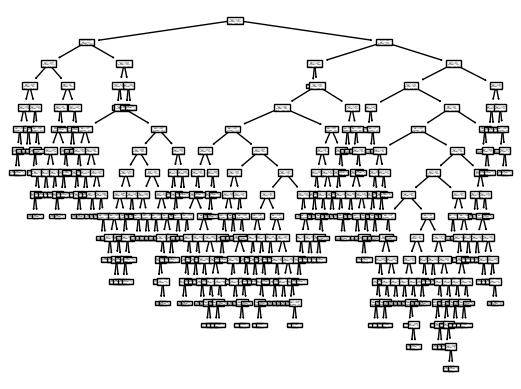

In [ ]:
# Plot Tree Awal
plot_tree(clf2)

In [ ]:
#Post Pruning(dipangkas setelah punya pohonnya)
clf=DecisionTreeClassifier()
path=clf.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

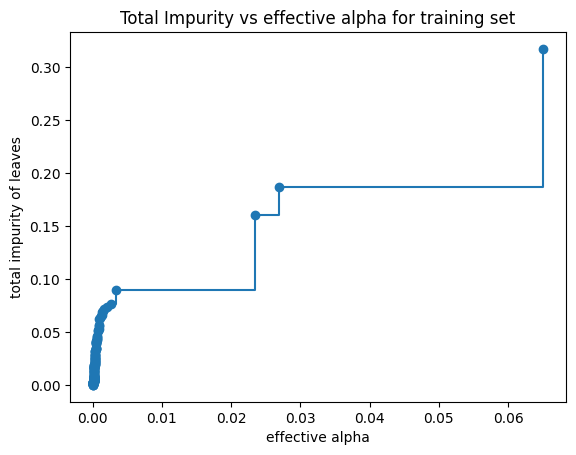

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_resampled, y_resampled)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1793185001114007


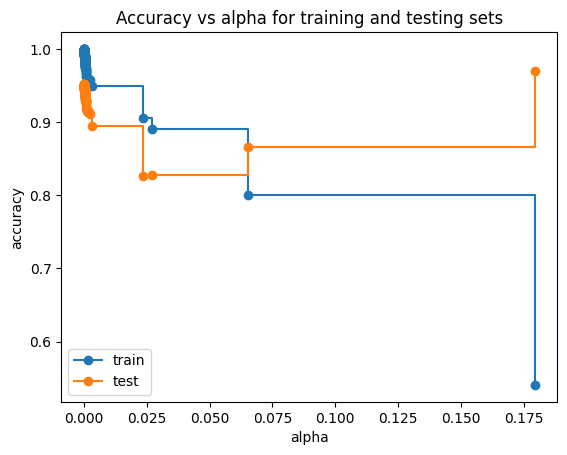

In [ ]:
train_scores = [clf.score(X_resampled, y_resampled) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
scores = pd.DataFrame({"train":train_scores,"test":test_scores,"alpha":ccp_alphas})
scores[:60]

train    test     alpha
0   1.000000  0.9524  0.000000
1   0.999919  0.9508  0.000074
2   0.999838  0.9512  0.000077
3   0.999757  0.9516  0.000077
4   0.999676  0.9508  0.000078
5   0.999596  0.9492  0.000080
6   0.999434  0.9492  0.000080
7   0.999353  0.9496  0.000080
8   0.999272  0.9520  0.000080
9   0.999110  0.9500  0.000080
10  0.999029  0.9504  0.000081
11  0.998949  0.9508  0.000081
12  0.998868  0.9496  0.000081
13  0.998787  0.9504  0.000081
14  0.998706  0.9488  0.000081
15  0.998463  0.9492  0.000121
16  0.998544  0.9500  0.000121
17  0.998302  0.9504  0.000129
18  0.998382  0.9476  0.000129
19  0.998140  0.9496  0.000135
20  0.998302  0.9500  0.000135
21  0.998221  0.9484  0.000139
22  0.998059  0.9488  0.000139
23  0.998140  0.9492  0.000142
24  0.997816  0.9504  0.000142
25  0.997897  0.9488  0.000147
26  0.997735  0.9484  0.000148
27  0.997735  0.9496  0.000148
28  0.997493  0.9496  0.000149
29  0.997574  0.9512  0.000150
30  0.997250  0.9484  0.000151
31  0.997412  0.9480  0.000151
32  0.997412  0.9492  0.000153
33  0.997007  0.9500  0.000154
34  0.997169  0.9472  0.000154
35  0.997007  0.9464  0.000154
36  0.996927  0.9480  0.000154
37  0.996684  0.9496  0.000155
38  0.996360  0.9480  0.000155
39  0.996522  0.9480  0.000156
40  0.996441  0.9492  0.000156
41  0.996118  0.9476  0.000157
42  0.996037  0.9480  0.000159
43  0.995956  0.9488  0.000159
44  0.996118  0.9476  0.000159
45  0.995794  0.9468  0.000160
46  0.995713  0.9476  0.000161
47  0.995713  0.9468  0.000161
48  0.995552  0.9476  0.000162
49  0.994985  0.9492  0.000194
50  0.994985  0.9484  0.000194
51  0.994743  0.9464  0.000198
52  0.994177  0.9472  0.000207
53  0.993610  0.9484  0.000212
54  0.993449  0.9476  0.000216
55  0.993206  0.9464  0.000222
56  0.992963  0.9468  0.000233
57  0.992721  0.9472  0.000238
58  0.992478  0.9460  0.000239
59  0.991993  0.9468  0.000240

In [ ]:
clf2_1=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.00024) #Gini Index
clf2_1.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.00024)

In [ ]:
Y_pred_p=clf2_1.predict(X_test)
print(classification_report(y_test,Y_pred_p))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2424
           1       0.33      0.72      0.45        76

    accuracy                           0.95      2500
   macro avg       0.66      0.84      0.71      2500
weighted avg       0.97      0.95      0.96      2500



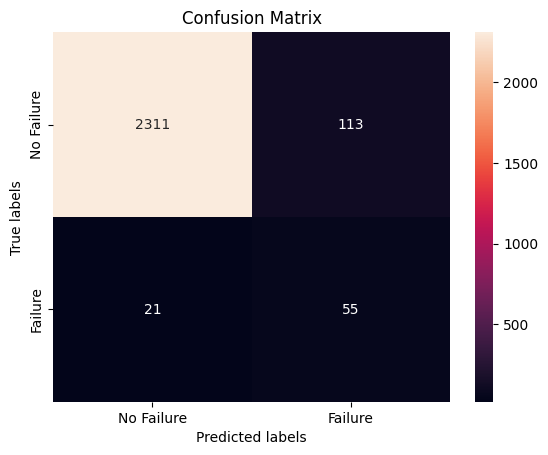

In [ ]:
cm = confusion_matrix(y_test, Y_pred_p)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

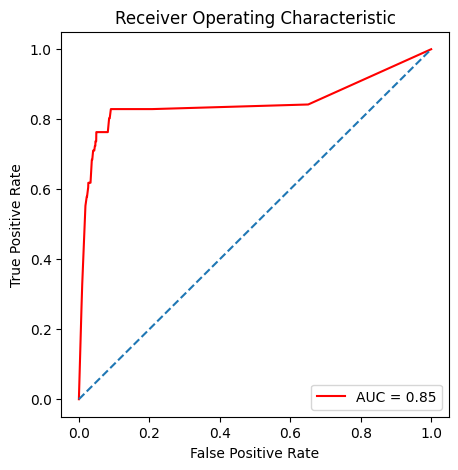

In [ ]:
y_proba_pruning=clf2_1.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba_pruning[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

### **4. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2424
           1       0.41      0.80      0.54        76

    accuracy                           0.96      2500
   macro avg       0.70      0.88      0.76      2500
weighted avg       0.98      0.96      0.97      2500



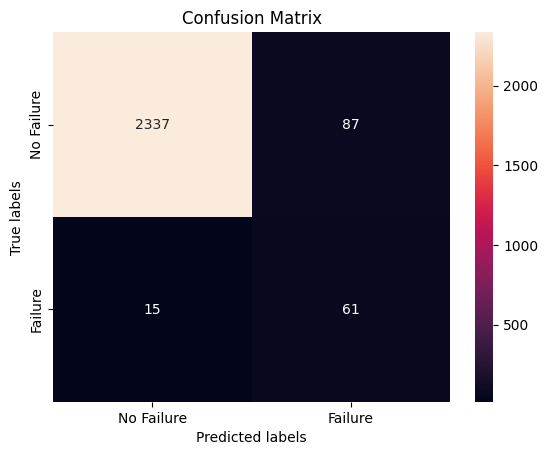

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

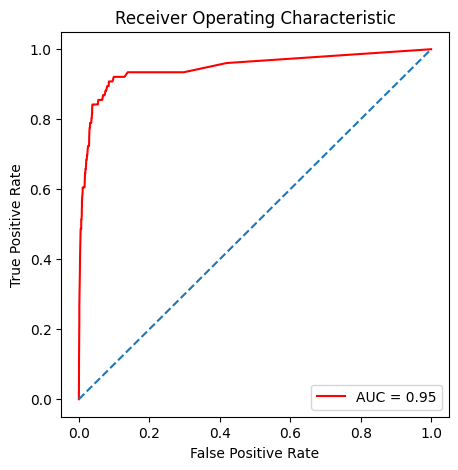

In [ ]:
y_proba_r=rf.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr, tpr, thresholds = roc_curve(y_test,y_proba_r[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_(fpr,tpr,roc_auc)

#### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
rf = RandomForestClassifier(random_state=42)

# parameters
parameter=[{'criterion' : ['gini', 'entropy', 'log_loss'],'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3],
             'max_features':['sqrt', 'log2', None]}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(rf, parameter, cv=folds, refit=True, verbose=2, scoring='f1', n_jobs=-1 )

# execute search
result = search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9588675813469798
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1}


In [ ]:
rfh = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = None, min_samples_leaf =  1)
rfh.fit(X_resampled,y_resampled)

y_pred_rfh=rfh.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rfh))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2424
           1       0.27      0.88      0.41        76

    accuracy                           0.92      2500
   macro avg       0.63      0.90      0.69      2500
weighted avg       0.97      0.92      0.94      2500



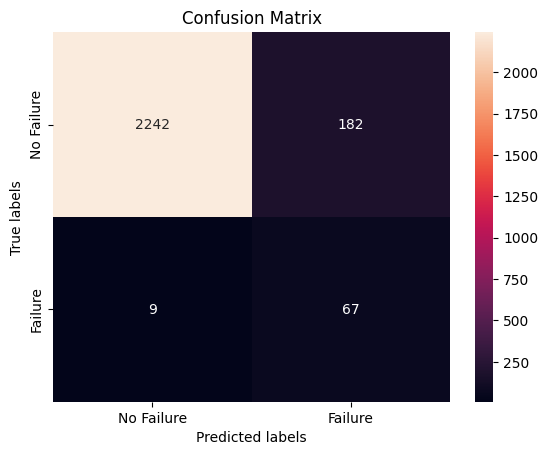

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfh)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

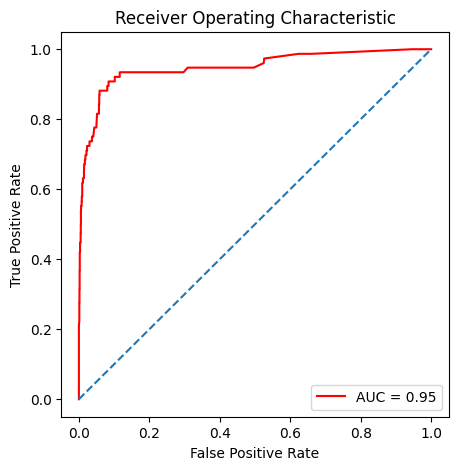

In [ ]:
#ROC Curve
y_proba_rfh=rfh.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_rfh[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

### **5. Gradien Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc= gbc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.96      2424
           1       0.29      0.86      0.44        76

    accuracy                           0.93      2500
   macro avg       0.64      0.90      0.70      2500
weighted avg       0.97      0.93      0.95      2500



#### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
gbc = GradientBoostingClassifier()

# parameters
parameter=[{'loss' : ['exponential'],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [50, 100, 200],
            'max_depth': [2, 3, 4],
            'min_samples_leaf': [1, 2, 3],
            'max_features' : ['log2']}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(gbc, parameter, cv=folds, scoring='f1')

# execute search
result = search.fit(X_resampled, y_resampled)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9919301470980264
Best Hyperparameters: {'learning_rate': 1, 'loss': 'exponential', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 200}


In [ ]:
gbh = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', max_depth = 4,
                                 max_features = 'log2', min_samples_leaf = 3, n_estimators = 200)
gbh.fit(X_resampled,y_resampled)

y_pred_gbh=gbh.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_gbh))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2424
           1       0.45      0.79      0.57        76

    accuracy                           0.96      2500
   macro avg       0.72      0.88      0.78      2500
weighted avg       0.98      0.96      0.97      2500



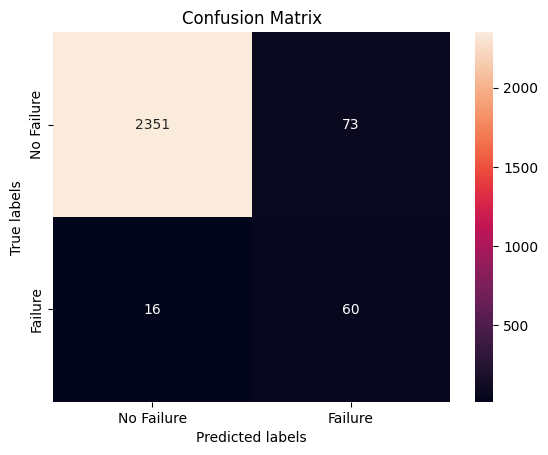

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbh)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

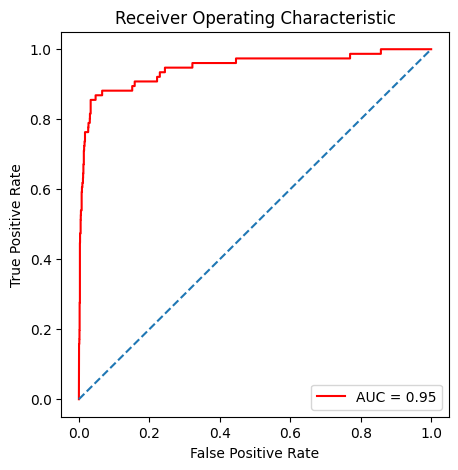

In [ ]:
#ROC Curve
y_proba_gb=gbh.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_gb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

### **6. XGboost**

In [ ]:
import xgboost as xgb

In [ ]:
xb = xgb.XGBClassifier()

In [ ]:
xb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xb = xb.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred_xb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2424
           1       0.43      0.83      0.57        76

    accuracy                           0.96      2500
   macro avg       0.71      0.90      0.78      2500
weighted avg       0.98      0.96      0.97      2500



#### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
xb = xgb.XGBClassifier()

# parameters
parameter=[{'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(xb, parameter, cv=folds, refit=True, verbose=2, scoring='f1', n_jobs=-1 )

# execute search
result = search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.989369154137558
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5}


In [ ]:
xgb_h = xgb.XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.15, max_depth = 7, min_child_weight = 1, subsample = 0.5)
xgb_h.fit(X_resampled,y_resampled)

y_pred_xgb_h=xgb_h.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_xgb_h))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2424
           1       0.41      0.84      0.55        76

    accuracy                           0.96      2500
   macro avg       0.70      0.90      0.76      2500
weighted avg       0.98      0.96      0.96      2500



In [ ]:
#Training score
print("Training Score :",xgb_h.score(X_resampled,y_resampled))
#Testing score
print("Testing Score :",xgb_h.score(X_test,y_test))

Training Score : 0.999595600129408
Testing Score : 0.958


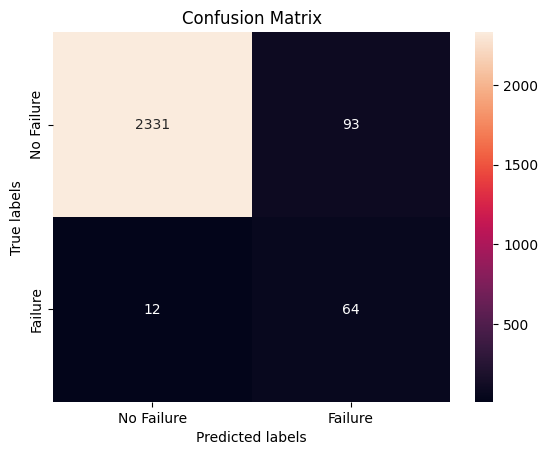

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb_h)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

#### Model Performance

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

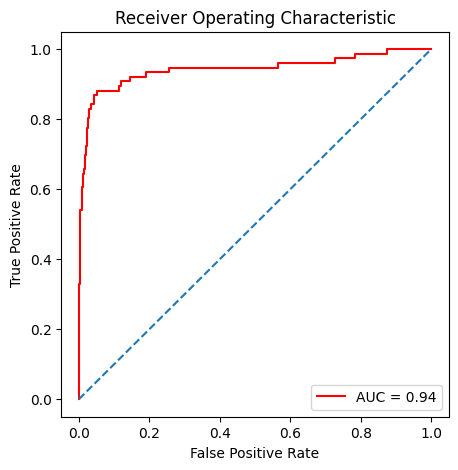

In [ ]:
#ROC Curve
y_proba_xb=xgb_h.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_xb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

# Model Evaluation

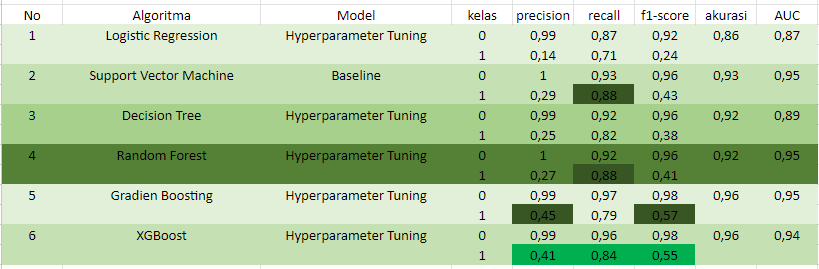

- Terlihat bahwa Pemodelan dengan Algortima XGBoost memiliki metrics evaluation yang paling stabil.
- Model terbaik yang akan kita pilih adalah model yang jika diimplementasikan akan menghasilkan cost terkecil. Dimana akan kita pilih model jika terdapat kesalahan klasifikasi akan di klasifikasikan pada False Positif dan memperkecil False Negative. Selanjutnya untuk memilih model terbaik akan dilakukan Cost Benefit Analysis.
- Untuk melihat seberapa cost yang bisa dihemat dari pemodelan ini, perlu ditentukan cost historis. Karena, tidak diketahui cost historis, maka dilakukan simulasi distribusi uniform kontinu untuk mendapat cost historis.


# Cost Baseline
karena tidak diketahui biaya yang dikeluarkan perusahaan sebelumnya dalam maintenance atau memperbaiki mesin. Dilakukan simulasi distribusi uniform untuk menentukan rasio cost sebelumnya yang dikeluarkan oleh perusahaan dalam maintenance atau memperbaiki mesin.

In [ ]:
engine_simulasi = pd.read_csv("/content/drive/Shareddrives/SC_Final Project/Dataset/Predictive Maintenance/ai4i2020.csv")

In [ ]:
engine_simulasi.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [ ]:
# kategori ulang variabel Machine failure
engine_simulasi['Machine failure'] = 0

engine_simulasi.loc[engine_simulasi['TWF'] == 1, 'Machine failure'] = 1
engine_simulasi.loc[engine_simulasi['HDF'] == 1, 'Machine failure'] = 1
engine_simulasi.loc[engine_simulasi['PWF'] == 1, 'Machine failure'] = 1
engine_simulasi.loc[engine_simulasi['OSF'] == 1, 'Machine failure'] = 1
engine_simulasi.loc[engine_simulasi['RNF'] == 1, 'Machine failure'] = 1

In [ ]:
engine_simulasi['Machine failure'].value_counts()

0    9652
1     348
Name: Machine failure, dtype: int64

In [ ]:
# Mengambil 2500 baris secara acak
sampled_df = engine_simulasi.sample(n=2500, random_state=42)

In [ ]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6252 to 73
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      2500 non-null   int64  
 1   Product ID               2500 non-null   object 
 2   Type                     2500 non-null   object 
 3   Air temperature [K]      2500 non-null   float64
 4   Process temperature [K]  2500 non-null   float64
 5   Rotational speed [rpm]   2500 non-null   int64  
 6   Torque [Nm]              2500 non-null   float64
 7   Tool wear [min]          2500 non-null   int64  
 8   Machine failure          2500 non-null   int64  
 9   TWF                      2500 non-null   int64  
 10  HDF                      2500 non-null   int64  
 11  PWF                      2500 non-null   int64  
 12  OSF                      2500 non-null   int64  
 13  RNF                      2500 non-null   int64  
dtypes: float64(3), int64(9)

In [ ]:
# Simulasi
np.random.seed(42)

def simulasi_distribusi_uniform_kontinu(min_value, max_value, jumlah_data):
    data_uniform = np.random.uniform(min_value, max_value, jumlah_data)
    return data_uniform

# Contoh penggunaan
min_value = 0
max_value = 1
jumlah_data = 2500

sampled_df['probability uniform'] = simulasi_distribusi_uniform_kontinu(min_value, max_value, jumlah_data)

In [ ]:
sampled_df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
6252  6253     L53432    L                300.8                    310.3   
4684  4685     M19544    M                303.6                    311.8   
1731  1732     M16591    M                298.3                    307.9   
4742  4743     L51922    L                303.3                    311.3   
4521  4522     L51701    L                302.4                    310.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
6252                    1538         36.1              198                0   
4684                    1421         44.8              101                0   
1731                    1485         42.0              117                0   
4742                    1592         33.7               14                0   
4521                    1865         23.9              129                0   

      TWF  HDF  PWF  OSF  RNF  probability uniform  
6252    0    0    0    0    0             0.374540  
4684    0    0    0    0    0             0.950714  
1731    0    0    0    0    0             0.731994  
4742    0    0    0    0    0             0.598658  
4521    0    0    0    0    0             0.156019

In [ ]:
# Fungsi untuk membuat kolom baru berdasarkan probabilitas
def create_new_column(prob):
    if prob < 0.5:
        return 0
    else:
        return 1

# Menerapkan fungsi pada kolom 'probability' untuk membuat kolom baru 'new_column'
sampled_df['Prediction target'] = sampled_df['probability uniform'].apply(create_new_column)

# Menampilkan hasil
sampled_df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
6252  6253     L53432    L                300.8                    310.3   
4684  4685     M19544    M                303.6                    311.8   
1731  1732     M16591    M                298.3                    307.9   
4742  4743     L51922    L                303.3                    311.3   
4521  4522     L51701    L                302.4                    310.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
6252                    1538         36.1              198                0   
4684                    1421         44.8              101                0   
1731                    1485         42.0              117                0   
4742                    1592         33.7               14                0   
4521                    1865         23.9              129                0   

      TWF  HDF  PWF  OSF  RNF  probability uniform  Prediction target  
6252    0    0    0    0    0             0.374540                  0  
4684    0    0    0    0    0             0.950714                  1  
1731    0    0    0    0    0             0.731994                  1  
4742    0    0    0    0    0             0.598658                  1  
4521    0    0    0    0    0             0.156019                  0

In [ ]:
# Membuat tabel kontingensi antara 'actual_target' dan 'prediction_target'
contingency_table = pd.crosstab(sampled_df['Machine failure'], sampled_df['Prediction target'])

# Menampilkan tabel kontingensi
print(contingency_table)

Prediction target     0     1
Machine failure              
0                  1200  1224
1                    38    38


#Cost Benefit Analysis

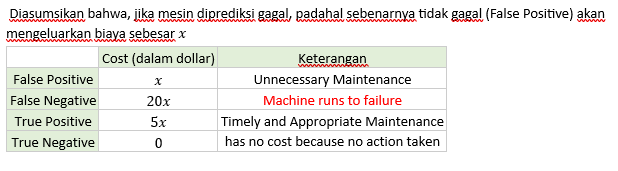

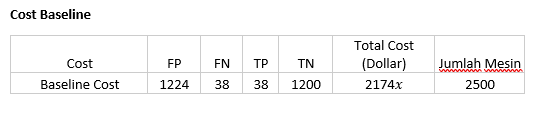

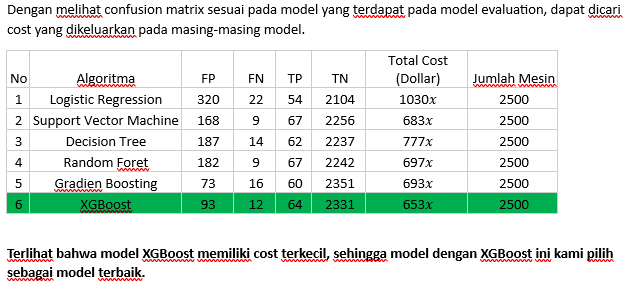

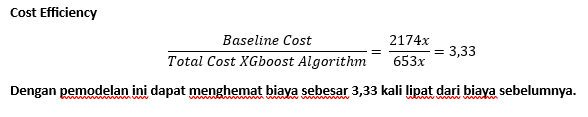

# Feature Importance

In [ ]:
# Mendapatkan feature importances
importan = xgb_h.feature_importances_

In [ ]:
# Membuat DataFrame dari feature importances
df_importan = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': importan})

In [ ]:
# Mengurutkan feature importances secara menurun
df_sorted = df_importan.sort_values(by='Importance', ascending=False)

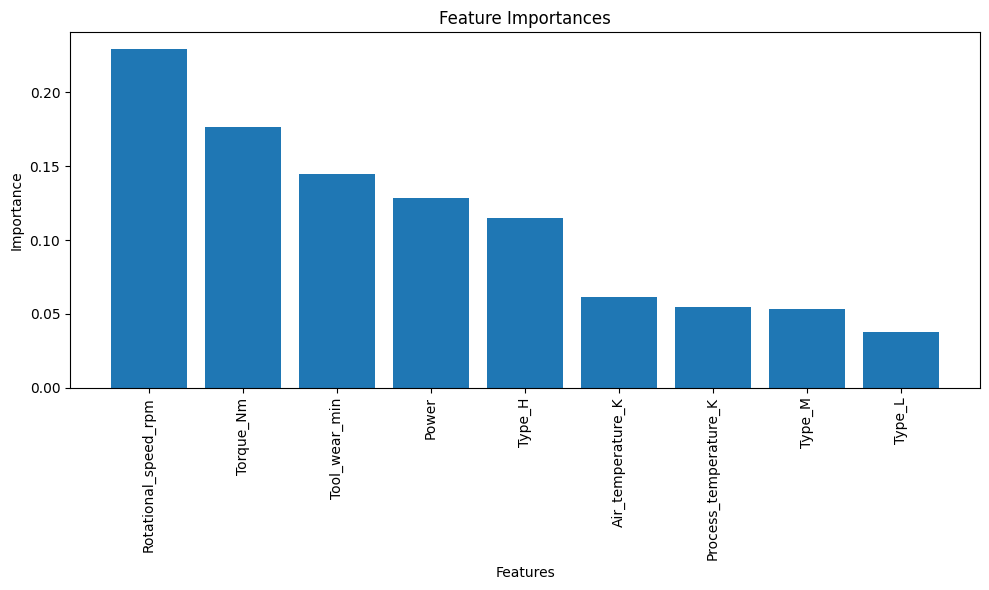

In [ ]:
# Membuat visualisasi plot bar
plt.figure(figsize=(10, 6))
plt.bar(range(len(df_sorted)), df_sorted['Importance'], align='center')
plt.xticks(range(len(df_sorted)), df_sorted['Feature'], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
# Get feature importances
importances = xgb_h.feature_importances_

# Print feature importances
for feature, importance in zip(X_resampled.columns, importances):
    print(f"{feature}: {importance}")

Air_temperature_K: 0.061155423521995544
Process_temperature_K: 0.05437532439827919
Rotational_speed_rpm: 0.2292521744966507
Torque_Nm: 0.17637719213962555
Tool_wear_min: 0.14443212747573853
Power: 0.12838052213191986
Type_H: 0.1150863766670227
Type_L: 0.03771541267633438
Type_M: 0.05322546139359474


**Percentage of Fitur Importance**

In [ ]:
# Get feature importances
importances = xgb_h.feature_importances_

# Calculate total importance
total_importance = sum(importances)

# Print percentage feature importances
for feature, importance in zip(X_resampled.columns, importances):
    percentage_importance = (importance / total_importance) * 100
    print(f"{feature}: {percentage_importance:.2f}%")

Air_temperature_K: 6.12%
Process_temperature_K: 5.44%
Rotational_speed_rpm: 22.93%
Torque_Nm: 17.64%
Tool_wear_min: 14.44%
Power: 12.84%
Type_H: 11.51%
Type_L: 3.77%
Type_M: 5.32%


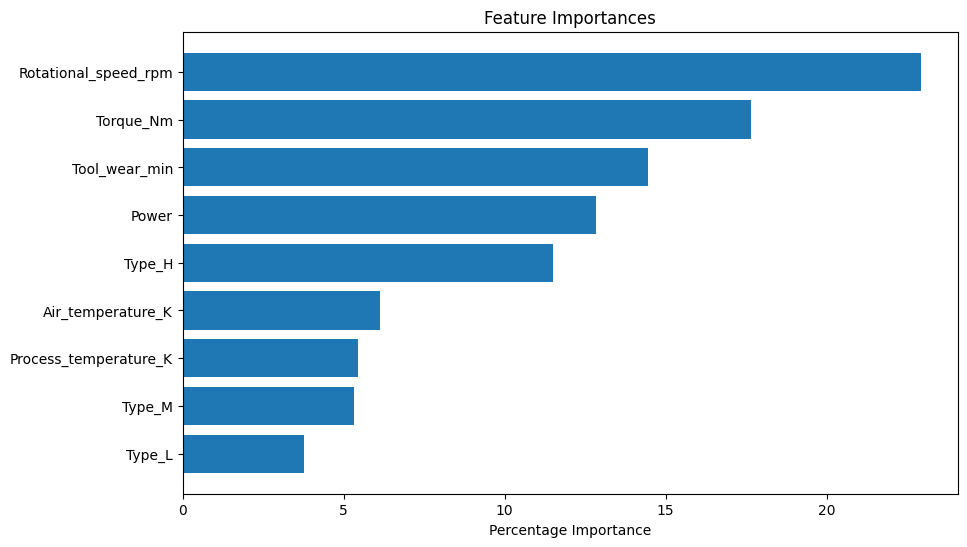

In [ ]:
# Calculate percentage feature importances
percentage_importances = [(importance / total_importance) * 100 for importance in importances]

# Create a sorted list of feature names and percentage importances
sorted_features = [feature for _, feature in sorted(zip(percentage_importances, X_resampled.columns))]
sorted_importances = sorted(percentage_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Percentage Importance')
plt.title('Feature Importances')
plt.show()



---
# Insight
---
- Rotational Speed merupakan faktor yang paling berkontribusi dalam mempengaruhi kegagalan mesin, yaitu sebesar 22.93%.
- Torque memiliki kontribusi dalam mempengaruhi kegagalan mesin sebesar 17.64%
- Tool Wear memiliki kontribusi dalam mempengaruhi kegagalan mesin sebesar 14.44%.
- Power memiliki kontribusi dalam mempengaruhi kegagalan mesin sebesar 12.84%.
- Mesin dengan Type H berkontribusi dalam mempengaruhi kegagalan mesin sebesar 11.51%.
- Dengan pemodelan ini dapat menghemat biaya sebesar 3,33 kali lipat dari biaya sebelumnya.






---
# Recommendation
---
- Perusahaan perlu menjaga rotational speed, torque, tool wear, dan power pada mesin dalam kondisi ideal untuk mencegah kegagalan mesin.
- Perusahaan perlu meninjau mesin dengan type H secara berkala karena mesin dengan type ini memiliki peluang kegagalan mesin yang lebih tinggi daripada type mesin laiinya.
- Dalam rangka menghemat biaya, lebih baik perusahaan melakukan maintenance terhadap mesin secara berkala untuk mencegah terjadinya kegagalan mesin daripada memperbaiki mesin yang sudah gagal. Maintenance tersebut perlu diutamakan pengecekan rotational speed, torque, tool wear,dan power pada mesin, serta mesin dengan type H.

